In [1]:
import os
import numpy as np
import pandas as pd

# getting data
from pydob.exploratory import get_high_level_trends_data, savefig, permits_now_year, permits_now_year_month

# plotting 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager as fm

from pydob.settings import nt_style, nt_blue, nt_black

# additional analysis
from indoorplants.analysis import features

In [2]:
%matplotlib inline
plt.style.use(nt_style)

In [3]:
# path_to_my_font = "/usr/share/fonts/truetype/HeliosAntique/HeliosAntique-Regular.ttf"

In [4]:
# prop = fm.FontProperties(fname=path_to_my_font)

## Preparing tables for analysis
### Get `complaints`, `permits`, `violations_ecb`, and `applications` yearly and monthly counts table 


In [5]:
tables_dict  =  get_high_level_trends_data(begin_year=2000, end_year=2019)

Reading streeteasy_sales from database.
Reading streeteasy_rent from database.


In [6]:
tables_dict.keys()

dict_keys(['violations_ecb_year', 'complaints_year', 'permits_now_year', 'permits_year', 'applications_year', 'violations_ecb_year_month', 'complaints_year_month', 'permits_now_year_month', 'permits_year_month', 'applications_year_month', 'streeteasy_sales', 'streeteasy_rent'])

In [7]:
applications_year_month = tables_dict['applications_year_month']
permits_year_month = tables_dict['permits_year_month']
complaints_year_month = tables_dict['complaints_year_month']
violations_ecb_year_month = tables_dict['violations_ecb_year_month']

In [8]:
applications_year = tables_dict['applications_year']
permits_year = tables_dict['permits_year']
complaints_year = tables_dict['complaints_year']
violations_ecb_year = tables_dict['violations_ecb_year']

### Get `permits_now` yearly 

In [9]:
permits_now_year = permits_now_year()

In [10]:
permits_now_year.columns = ['permits_now']

### Get `permits_now` year_month

In [11]:
permits_now_year_month = permits_now_year_month()

# 1.0 Overview <a class="anchor" id="step1"></a>

## 1.1 Normalized and Counts per year <a class="anchor" id="step1_1"></a>

**Notes:**
- `table_to_plot`: yearly counts with four features (`applications`, `permits`, `complaints`, `violations`)
- Analysis period is from 2000 to 2018

In [12]:
table_to_plot = applications_year.join(
                    permits_year).join(
                permits_now_year).join(
                 complaints_year).join(
             violations_ecb_year)

In [13]:
table_to_plot.columns = ['applications', 'permits', "permits_now", "complaints", "violations",]

**Notes:**
- Since we are limit to DOB NOW job applications data set (no `Date` related features), we assume that permits issued in total is 79.081474% of applications applied from 2017 to 2019. 
- More explaination can be find at applications_and_permits.ipynb.

In [14]:
permit_applic_rate_assum = table_to_plot.loc[2016].permits / table_to_plot.loc[2016].applications

In [15]:
table_to_plot.columns = ['applications', 'permits', "permits_now", "complaints", "violations",]

In [16]:
table_to_plot.permits_now = table_to_plot.permits_now.fillna(0)

In [17]:
table_to_plot['permits_total'] = table_to_plot.permits+table_to_plot.permits_now

In [18]:
table_to_plot.loc[2017,'applications'] = table_to_plot.loc[2017,'permits_total']/permit_applic_rate_assum

In [19]:
table_to_plot.loc[2018,'applications'] = table_to_plot.loc[2018,'permits_total']/permit_applic_rate_assum

In [20]:
table_to_plot.loc[2019,'applications'] = table_to_plot.loc[2019,'permits_total']/permit_applic_rate_assum

In [21]:
table_to_plot.drop(columns=['permits_now','permits'],inplace=True)

In [22]:
table_to_plot.index = table_to_plot.index.astype(int)

In [23]:
table_to_plot =table_to_plot.loc[2000:2019]

In [24]:
table_to_plot

,applications,complaints,violations,permits_total
pre_filing_date_year,,,,
2000,67735.000000,43520,41030,101496.0
2001,67320.000000,45124,42059,105728.0
2002,70045.000000,51991,40566,111931.0
2003,72817.000000,62542,45041,122595.0
2004,80833.000000,78212,44962,137618.0
2005,86264.000000,108873,49196,150087.0
2006,86896.000000,112953,51687,155861.0
2007,90201.000000,129247,58225,158250.0
2008,84548.000000,142991,76940,150370.0


### Plotting

In [25]:
ordered_cols = pd.Categorical(table_to_plot.columns,
                              categories=['applications', 'permits_total', "complaints", "violations"],
                              ordered=True
                             ).sort_values()

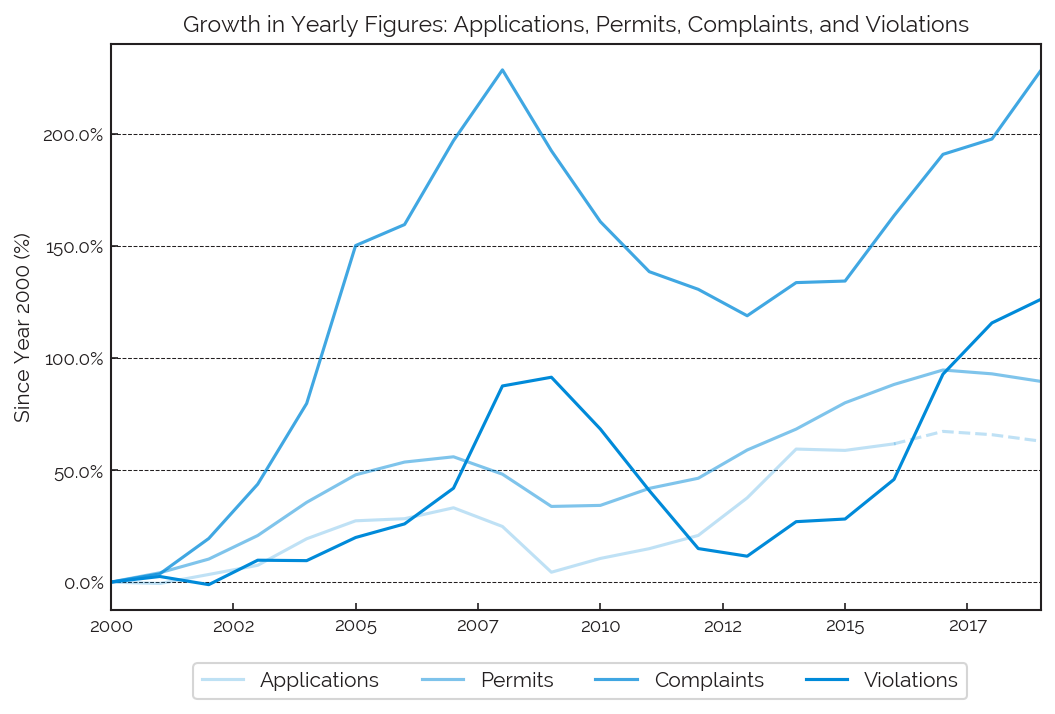

In [26]:
fig, ax = plt.subplots()

table_to_plot_normed = table_to_plot / table_to_plot.iloc[0]
table_to_plot_normed = (table_to_plot_normed - 1) * 100
labels = ['Applications', 'Permits', 'Complaints', 'Violations']

ax = table_to_plot_normed[ordered_cols[0]].loc[:2016].plot(alpha = .25,
                                                           label = labels[0], 
                                                           color = nt_blue)
ax = table_to_plot_normed[ordered_cols[0]].loc[2016:].plot(alpha = .25,
                                                           label = '_',
                                                           color = nt_blue, 
                                                           linestyle = '--')

for i, c in enumerate(ordered_cols[1:], 1):
    ax = table_to_plot_normed[c].plot(ax=ax, color=nt_blue, alpha = .25 * (i + 1), label=labels[i])
    
    
    
l = ax.legend(loc='center left', 
           bbox_to_anchor=(0.0775, -0.125),
           fancybox=True,
           shadow=False, 
           ncol=4)

xlabs = ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ylabs = ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%s%%'))
plt.title("Growth in Yearly Figures: Applications, Permits, Complaints, and Violations")
ylab = ax.set_ylabel("Since Year 2000 (%)")
xlab = ax.set_xlabel(None)
g = plt.grid(axis="y")

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

savefig("percent_change_all.png", fig, bottom=.125)

In [27]:
table_to_plot

,applications,complaints,violations,permits_total
pre_filing_date_year,,,,
2000,67735.000000,43520,41030,101496.0
2001,67320.000000,45124,42059,105728.0
2002,70045.000000,51991,40566,111931.0
2003,72817.000000,62542,45041,122595.0
2004,80833.000000,78212,44962,137618.0
2005,86264.000000,108873,49196,150087.0
2006,86896.000000,112953,51687,155861.0
2007,90201.000000,129247,58225,158250.0
2008,84548.000000,142991,76940,150370.0


In [28]:
table_to_plot.max()

applications     113287.657525
complaints       142991.000000
violations        92800.000000
permits_total    197556.000000
dtype: float64

In [29]:
table_to_plot.idxmax()

applications     2017
complaints       2008
violations       2019
permits_total    2017
dtype: int64

### Ratios

- this actually shows up in the `Complaints & Violations` section

In [30]:
complaints_to_permits = table_to_plot.complaints / table_to_plot.permits_total

In [31]:
complaints_to_permits = complaints_to_permits.rename("complaints_to_permits")

In [32]:
violations_to_permits = table_to_plot.violations / table_to_plot.permits_total

In [33]:
violations_to_permits = violations_to_permits.rename("violations_to_permits")

In [34]:
to_plot_ratios = complaints_to_permits.to_frame().join(violations_to_permits)

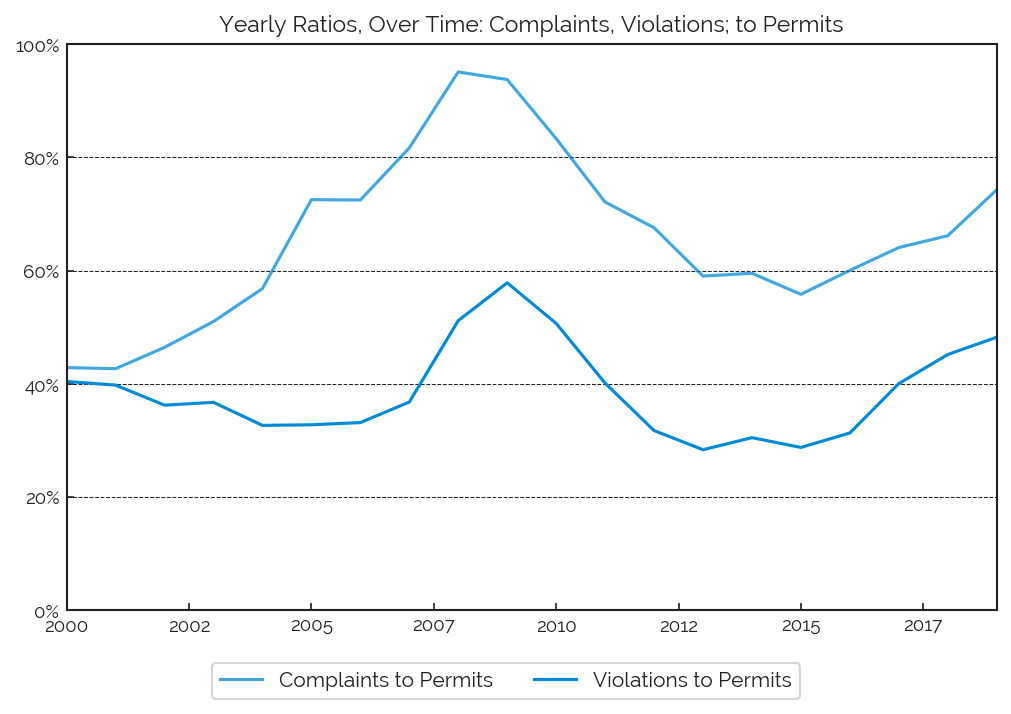

In [35]:
fig, ax = plt.subplots()

labels = ['Complaints to Permits', "Violations to Permits"]

to_plot_ratios

ax = to_plot_ratios["complaints_to_permits"].plot(alpha=.75, label=labels[0], color=nt_blue)
ax = to_plot_ratios["violations_to_permits"].plot(alpha=1, label=labels[1], color=nt_blue)

l = ax.legend(loc='center left', 
           bbox_to_anchor=(0.145, -0.125),
           fancybox=True,
           shadow=False, 
           ncol=2)

xlabs = ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
xlab = ax.set_xlabel(None)

ylim = ax.set_ylim([0, 1])
ylabs = ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

plt.title("Yearly Ratios, Over Time: Complaints, Violations; to Permits")

g = plt.grid(axis="y")

ax.spines["top"].set_visible(True)
ax.spines["right"].set_visible(True)

savefig("ratios.png", fig, bottom=.125)

In [36]:
to_plot_ratios

,complaints_to_permits,violations_to_permits
pre_filing_date_year,,
2000,0.428785,0.404252
2001,0.426793,0.397804
2002,0.464492,0.362420
2003,0.510151,0.367397
2004,0.568327,0.326716
2005,0.725399,0.327783
2006,0.724703,0.331622
2007,0.816727,0.367930
2008,0.950928,0.511671


## 1.2 Autocrrelation Analysis <a class="anchor" id="step1_2"></a>

**Notes:**
- Analysis is based on percentage change on each year's counts
- Autocorrelation has 0 to 10 lags


### complaints`, `permits`, `violations_ecb`, and `applications`  (year_month)

In [37]:
def get_autocorr_dataframe(dataframe,lag_range,columns):
    autocorr_data =[]
    for j in columns:
        i_l = []
        for i in lag_range:
            autocorr = dataframe[j].autocorr(lag=i)
            i_l.append(autocorr)
        autocorr_data.append(i_l)
        
    autocorr_df = pd.DataFrame(data=autocorr_data,).T
    autocorr_df.columns = columns
    autocorr_df.index = lag_range
    return autocorr_df
    

In [38]:
columns = [ 'applications', 'permits', 'complaints', 'violations','permits_now']

In [39]:
pct_change_year_month = applications_year_month.join(
                                                   permits_year_month
                                              ).join(
                                                   complaints_year_month
                                              ).join(
                                                   violations_ecb_year_month
                                              ).join(
                                                   permits_now_year_month)

In [40]:
pct_change_year_month.columns = columns

In [41]:
pct_change_year_month['permits_now']=pct_change_year_month.permits_now.fillna(0)

In [42]:
pct_change_year_month['permits_total'] = pct_change_year_month.permits + pct_change_year_month.permits_now

In [43]:
pct_change_year_month = pct_change_year_month.pct_change()

In [44]:
lags = list(range(1, 31))

In [45]:
pct_change_year_month.drop(columns=['permits','permits_now'],inplace = True)

In [46]:
pct_change_year_month.columns

Index(['applications', 'complaints', 'violations', 'permits_total'], dtype='object')

In [47]:
autocorr_df_year_month = get_autocorr_dataframe(
                                        dataframe=pct_change_year_month,
                                        lag_range=lags,
                                        columns=['applications', 'complaints', 'violations', 'permits_total']
                                    )

In [48]:
autocorr_df_year_month.index.name = "lags"

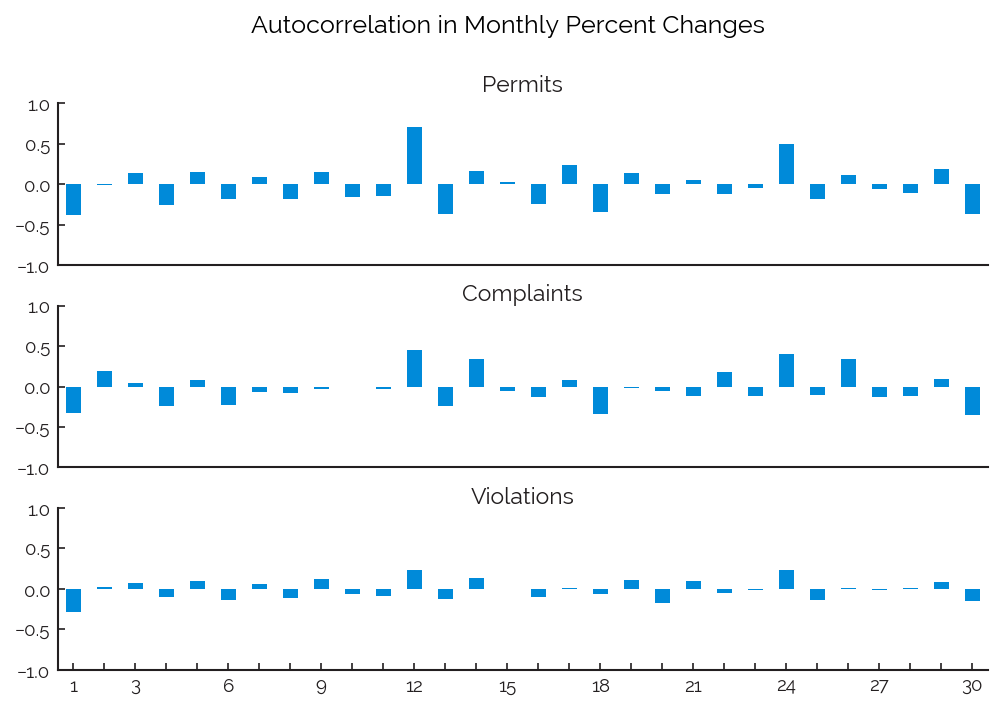

In [49]:
fig, axs = plt.subplots(3, 1)

autocorr_df_year_month['permits_total'].plot.bar(ax=axs[0], width=0.5, color=nt_blue, rot=0)
axs[0].set_title('Permits')

autocorr_df_year_month['complaints'].plot.bar(ax=axs[1], width=0.5, color=nt_blue, rot=0)
axs[1].set_title('Complaints', pad=-1)

autocorr_df_year_month['violations'].plot.bar(ax=axs[2], width=0.5, color=nt_blue, rot=0)
axs[2].set_title('Violations', pad=1)

# fig.text(.515, .0525, 'Lags', ha='center')
# fig.text(.065, .5, 'Autocorrelation', va='center', rotation='vertical')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for i, ax in enumerate(axs.flat):
    if i < 2:
        ax.xaxis.set_major_locator(plt.NullLocator())
    else:
        xticks = ax.xaxis.get_major_ticks()
        
        to_keep = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
        for j, tick in enumerate(xticks, 1):
            if j not in to_keep:
                tick.label1.set_visible(False)
    
    ylim = ax.set_ylim([-1, 1])
    ax.set_xlabel(None)

    
t= plt.figtext(0.5, .975, "Autocorrelation in Monthly Percent Changes",
               fontsize='large', color='black', ha ='center')

plt.subplots_adjust(hspace=.25)

savefig("autocorrelations_all_yearly.png", fig, bottom=.125)

In [50]:
autocorr_df_year_month[['complaints','violations','permits_total']]

,complaints,violations,permits_total
lags,,,
1,-0.328890,-0.291068,-0.382373
2,0.192306,0.025308,-0.008993
3,0.039626,0.068256,0.146137
4,-0.244665,-0.107328,-0.259690
5,0.080146,0.099334,0.148509
6,-0.225224,-0.139810,-0.182140
7,-0.070911,0.056295,0.089662
8,-0.075883,-0.116743,-0.176381
9,-0.034335,0.122574,0.147122
